In [1]:
import pickle
import os
import pandas as pd
import random
from copy import deepcopy
from collections import defaultdict
import geopandas as gp
from matplotlib import pyplot as plt
from pam.core import Population, Household, Person
from pam.activity import Plan, Activity, Leg
from pam.utils import minutes_to_datetime as mtdt
from pam.variables import END_OF_DAY

from pam.policy import *

In [2]:
def hhld_apply(household, policy):
    new_hhld = deepcopy(household) 
    policy.apply_to(new_hhld)
    return new_hhld

def print_attributes(hhld, attribs=None):
    if attribs is not None:
        print(f"Household: {hhld}")
        for pid, person in hhld.people.items():
            print(f"Person: {pid}")
            print(f"Attributes:")
            for attrib in attribs:
                print(f"\t{attrib}: {person.attributes[attrib]}")
    else:
        print(f"Household: {hhld}")
        for pid, person in hhld.people.items():
            print(f"Person: {pid}")
            print(f"Attributes:")
            pp.pprint(person.attributes)
            
def instantiate_household_with(persons: list):
    household = Household(1)
    for person in persons:
        household.add(person)
    return household

def Steve():
    Steve = Person('Steve', attributes={'age': 50, 'job': 'work', 'gender': 'male'})
    Steve.add(Activity(1, 'home', 'a', start_time=mtdt(0), end_time=mtdt(5 * 60)))
    Steve.add(Leg(1, 'car', 'a', 'b', start_time=mtdt(5 * 60), end_time=mtdt(6 * 60)))
    Steve.add(Activity(2, 'work', 'b', start_time=mtdt(6 * 60), end_time=mtdt(12 * 60)))
    Steve.add(Leg(2, 'walk', 'b', 'c', start_time=mtdt(12 * 60), end_time=mtdt(12 * 60 + 10)))
    Steve.add(Activity(3, 'leisure', 'c', start_time=mtdt(12 * 60 + 10), end_time=mtdt(13 * 60 - 10)))
    Steve.add(Leg(3, 'walk', 'c', 'b', start_time=mtdt(13 * 60 - 10), end_time=mtdt(13 * 60)))
    Steve.add(Activity(4, 'work', 'b', start_time=mtdt(13 * 60), end_time=mtdt(18 * 60)))
    Steve.add(Leg(4, 'car', 'b', 'a', start_time=mtdt(18 * 60), end_time=mtdt(19 * 60)))
    Steve.add(Activity(5, 'home', 'a', start_time=mtdt(19 * 60), end_time=mtdt(20 * 60)))
    Steve.add(Leg(5, 'car', 'a', 'b', start_time=mtdt(20 * 60), end_time=mtdt(20 * 60 + 20)))
    Steve.add(Activity(6, 'shop_1', 'b', start_time=mtdt(20 * 60 + 20), end_time=mtdt(20 * 60 + 50)))
    Steve.add(Leg(6, 'walk', 'b', 'b', start_time=mtdt(20 * 60 + 50), end_time=mtdt(21 * 60)))
    Steve.add(Activity(7, 'shop_2', 'b', start_time=mtdt(21 * 60), end_time=mtdt(21 * 60 + 50)))
    Steve.add(Leg(7, 'car', 'b', 'a', start_time=mtdt(21 * 60 + 50), end_time=mtdt(22 * 60 + 10)))
    Steve.add(Activity(8, 'home', 'a', start_time=mtdt(22 * 60 + 10), end_time=END_OF_DAY))
    return Steve

def Hilda():
    Hilda = Person('Hilda', attributes={'age': 45, 'job': 'influencer', 'gender': 'female'})
    Hilda.add(Activity(1, 'home', 'a', start_time=mtdt(0), end_time=mtdt(8 * 60)))
    Hilda.add(Leg(1, 'walk', 'a', 'b', start_time=mtdt(8 * 60), end_time=mtdt(8 * 60 + 5)))
    Hilda.add(Activity(2, 'escort', 'b', start_time=mtdt(8 * 60 + 5), end_time=mtdt(8 * 60 + 30)))
    Hilda.add(Leg(1, 'pt', 'a', 'b', start_time=mtdt(8 * 60), end_time=mtdt(8 * 60 + 30)))
    Hilda.add(Activity(2, 'shop', 'b', start_time=mtdt(8 * 60 + 30), end_time=mtdt(14 * 60)))
    Hilda.add(Leg(2, 'pt', 'b', 'c', start_time=mtdt(14 * 60), end_time=mtdt(14 * 60 + 20)))
    Hilda.add(Activity(3, 'leisure', 'c', start_time=mtdt(14 * 60 + 20), end_time=mtdt(16 * 60 - 20)))
    Hilda.add(Leg(3, 'pt', 'c', 'b', start_time=mtdt(16 * 60 - 20), end_time=mtdt(16 * 60)))
    Hilda.add(Activity(4, 'escort', 'b', start_time=mtdt(16 * 60), end_time=mtdt(16 * 60 + 30)))
    Hilda.add(Leg(4, 'walk', 'a', 'b', start_time=mtdt(16 * 60 + 30), end_time=mtdt(17 * 60)))
    Hilda.add(Activity(5, 'home', 'a', start_time=mtdt(17 * 60), end_time=mtdt(20 * 60)))
    Hilda.add(Leg(5, 'car', 'a', 'b', start_time=mtdt(20 * 60), end_time=mtdt(20 * 60 + 20)))
    Hilda.add(Activity(6, 'shop_1', 'b', start_time=mtdt(20 * 60 + 20), end_time=mtdt(20 * 60 + 50)))
    Hilda.add(Leg(6, 'walk', 'b', 'b', start_time=mtdt(20 * 60 + 50), end_time=mtdt(21 * 60)))
    Hilda.add(Activity(7, 'shop_2', 'b', start_time=mtdt(21 * 60), end_time=mtdt(21 * 60 + 50)))
    Hilda.add(Leg(7, 'car', 'b', 'a', start_time=mtdt(21 * 60 + 50), end_time=mtdt(22 * 60 + 10)))
    Hilda.add(Activity(8, 'home', 'a', start_time=mtdt(22 * 60 + 10), end_time=END_OF_DAY))
    return Hilda

def Timmy():
    Timmy = Person('Timmy', attributes={'age': 18, 'job': 'education', 'gender': 'male'})
    Timmy.add(Activity(1, 'home', 'a', start_time=mtdt(0), end_time=mtdt(8 * 60)))
    Timmy.add(Leg(1, 'walk', 'a', 'b', start_time=mtdt(8 * 60), end_time=mtdt(8 * 60 + 5)))
    Timmy.add(Activity(2, 'sport', 'b', start_time=mtdt(8 * 60 + 5), end_time=mtdt(8 * 60 + 55)))
    Timmy.add(Leg(2, 'walk', 'b', 'a', start_time=mtdt(8 * 60 + 55), end_time=mtdt(9 * 60)))
    Timmy.add(Activity(3, 'home', 'a', start_time=mtdt(9 * 60), end_time=mtdt(10 * 60)))
    Timmy.add(Leg(3, 'bike', 'a', 'b', start_time=mtdt(10 * 60), end_time=mtdt(11 * 60)))
    Timmy.add(Activity(4, 'education', 'b', start_time=mtdt(11 * 60), end_time=mtdt(13 * 60)))
    Timmy.add(Leg(4, 'bike', 'b', 'c', start_time=mtdt(13 * 60), end_time=mtdt(13 * 60 + 5)))
    Timmy.add(Activity(5, 'shop', 'c', start_time=mtdt(13 * 60 + 5), end_time=mtdt(13 * 60 + 30)))
    Timmy.add(Leg(5, 'bike', 'c', 'b', start_time=mtdt(13 * 60 + 30), end_time=mtdt(13 * 60 + 35)))
    Timmy.add(Activity(6, 'education', 'b', start_time=mtdt(13 * 60 + 35), end_time=mtdt(15 * 60)))
    Timmy.add(Leg(6, 'bike', 'b', 'd', start_time=mtdt(15 * 60), end_time=mtdt(15 * 60 + 10)))
    Timmy.add(Activity(7, 'leisure', 'd', start_time=mtdt(15 * 60 + 10), end_time=mtdt(18 * 60)))
    Timmy.add(Leg(7, 'bike', 'd', 'a', start_time=mtdt(18 * 60), end_time=mtdt(18 * 60 + 20)))
    Timmy.add(Activity(8, 'home', 'a', start_time=mtdt(18 * 60 + 20), end_time=mtdt(20 * 60)))
    Timmy.add(Leg(8, 'car', 'a', 'b', start_time=mtdt(20 * 60), end_time=mtdt(20 * 60 + 20)))
    Timmy.add(Activity(9, 'shop_1', 'b', start_time=mtdt(20 * 60 + 20), end_time=mtdt(20 * 60 + 50)))
    Timmy.add(Leg(9, 'walk', 'b', 'b', start_time=mtdt(20 * 60 + 50), end_time=mtdt(21 * 60)))
    Timmy.add(Activity(10, 'shop_2', 'b', start_time=mtdt(21 * 60), end_time=mtdt(21 * 60 + 50)))
    Timmy.add(Leg(10, 'car', 'b', 'a', start_time=mtdt(21 * 60 + 50), end_time=mtdt(22 * 60 + 10)))
    Timmy.add(Activity(11, 'home', 'a', start_time=mtdt(22 * 60 + 10), end_time=END_OF_DAY))
    return Timmy

def Bobby():
    Bobby = Person('Bobby', attributes={'age': 6, 'job': 'education', 'gender': 'female'})
    Bobby.add(Activity(1, 'home', 'a', start_time=mtdt(0), end_time=mtdt(8 * 60)))
    Bobby.add(Leg(1, 'walk', 'a', 'b', start_time=mtdt(8 * 60), end_time=mtdt(8 * 60 + 30)))
    Bobby.add(Activity(2, 'education', 'b', start_time=mtdt(8 * 60 + 30), end_time=mtdt(16 * 60)))
    Bobby.add(Leg(2, 'walk', 'b', 'c', start_time=mtdt(16 * 60), end_time=mtdt(16 * 60 + 30)))
    Bobby.add(Activity(3, 'home', 'a', start_time=mtdt(16 * 60 + 30), end_time=mtdt(20 * 60)))
    Bobby.add(Leg(3, 'car', 'a', 'b', start_time=mtdt(20 * 60), end_time=mtdt(20 * 60 + 20)))
    Bobby.add(Activity(4, 'shop_1', 'b', start_time=mtdt(20 * 60 + 20), end_time=mtdt(20 * 60 + 50)))
    Bobby.add(Leg(4, 'walk', 'b', 'b', start_time=mtdt(20 * 60 + 50), end_time=mtdt(21 * 60)))
    Bobby.add(Activity(5, 'shop_2', 'b', start_time=mtdt(21 * 60), end_time=mtdt(21 * 60 + 50)))
    Bobby.add(Leg(5, 'car', 'b', 'a', start_time=mtdt(21 * 60 + 50), end_time=mtdt(22 * 60 + 10)))
    Bobby.add(Activity(6, 'home', 'a', start_time=mtdt(22 * 60 + 10), end_time=END_OF_DAY))
    return Bobby


# Sampling and Policy Levels

In [3]:
smiths = instantiate_household_with([Steve(), Hilda(), Timmy(), Bobby()])

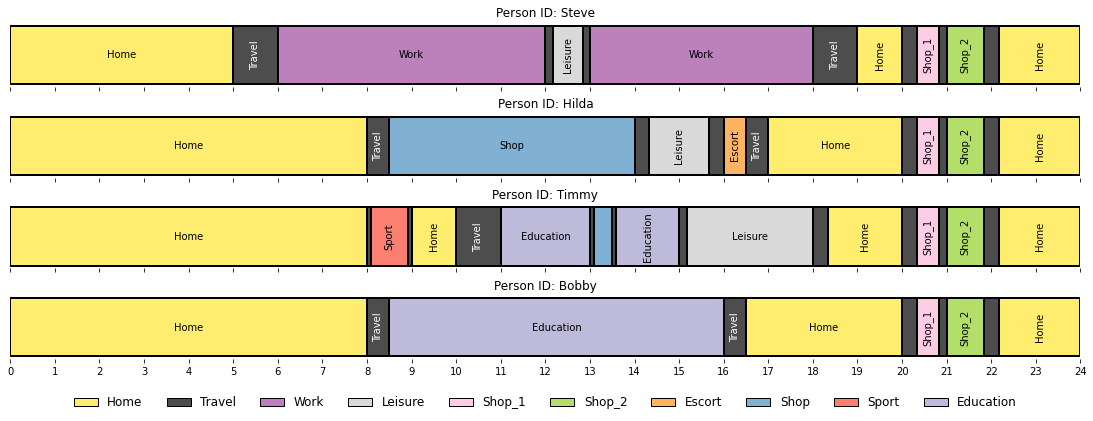

In [4]:
smiths.plot()

## Household

$$P_{household} = 1 - (1-P_{person})^n$$

If you have a probability that drives of any one person living in the household.

The probability of the household being chosen is then 
$$1 - (1-P)^n$$
where $P$ is the probability any one person being chosen and $n$ is the number of people in the household; $(1-P)^n$ is the probability of no one being picked.

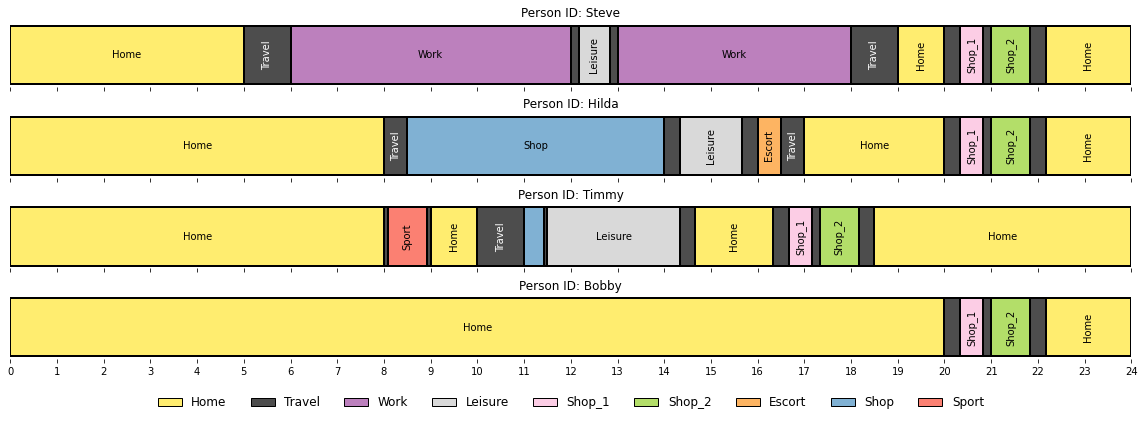

In [5]:
hhld_apply(smiths, HouseholdPolicy(RemoveActivity(['education']),1)).plot()

## Person

If you have a probability that drives of any one activity a person does.

The probability of the person being chosen is then 
$$1 - (1-P)^n$$
where $P$ is the probability any one (relevant) activity being chosen and $n$ is the number of (relevant) activities in the person's plan; $(1-P)^n$ is the probability of no relevant activities being picked.

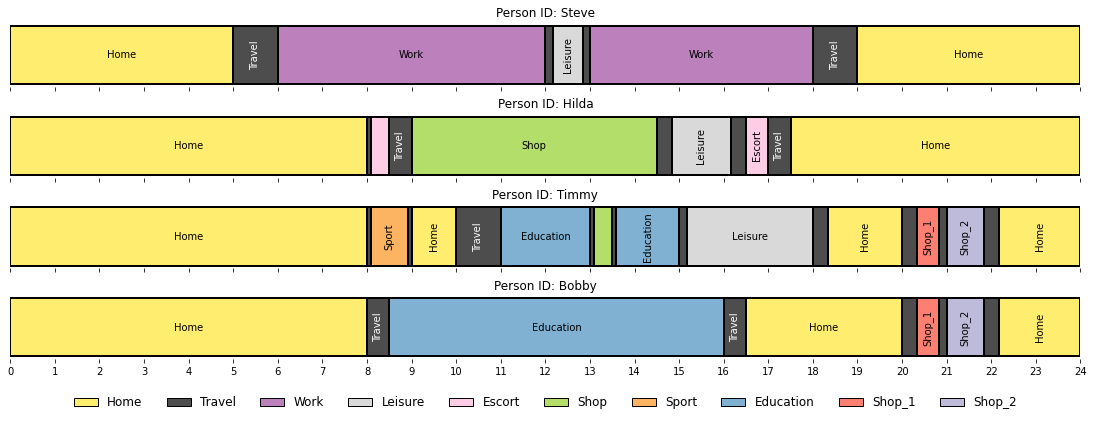

In [6]:
hhld_apply(smiths, PersonPolicy(RemoveActivity(['shop_1', 'shop_2']),0.5)).plot()

## Activity

If you have a probability that drives of any one activity a person does and you want to affect particular activities with no consequence to the person or household.

Notice that given a probability $P$ for an activity you can affect the whole household. The probability of the household being chosen is then 
$$1 - (1-P)^n$$
where $P$ is the probability any one (relevant) activity being chosen and $n$ is then the number of all (relevant) activities in **all of the persons plans within a household**; $(1-P)^n$ is the probability of no relevant activities being picked for the household.

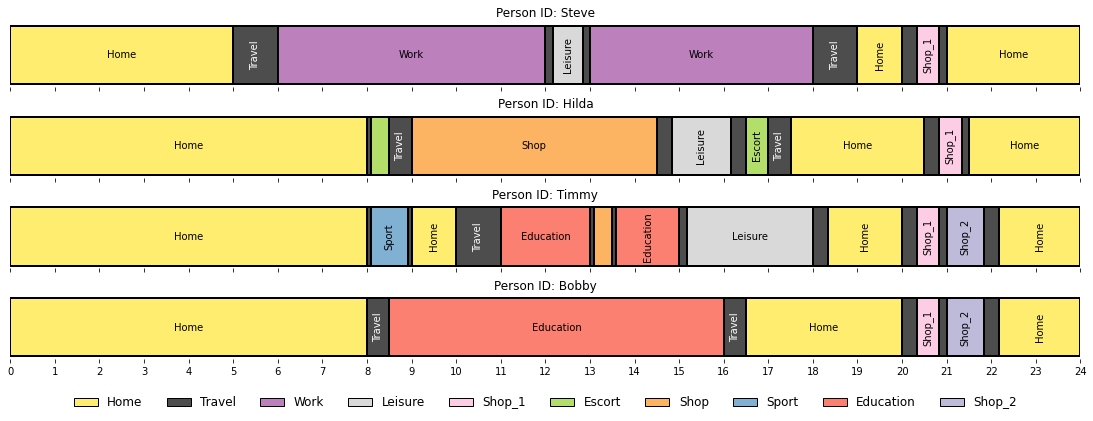

In [7]:
hhld_apply(smiths, ActivityPolicy(RemoveActivity(['shop_1', 'shop_2']),0.5)).plot()

The Policies expect certain levels of probability. For example, performing a `HouseholdPolicy` is easy, you can affect a whole household using a probability at any level, `household`, `person` or `activity`. Performing an `ActivityPolicy` however means you need information at the level of the activities you want to affect.

|  | HouseholdProbability | PersonProbability | ActivityProbability |
| --- | --- | --- | --- |
| HouseholdPolicy | Yes | Yes | Yes |
| PersonPolicy | --- | Yes | Yes |
| ActivityPolicy | --- | --- | Yes |

### Joint distributions

You can give the `SamplingProbability` classes custom samplers with joint (or not) distributions. That changes the following table

|  | HouseholdProbability | PersonProbability | ActivityProbability |
| --- | --- | --- | --- |
| HouseholdPolicy | $$p$$ | $$1-(1-p)^{n_p}$$ | $$1-(1-p)^{n_{a,h}}$$ |
| PersonPolicy | $$-$$ | $$p$$ | $$1-(1-p)^{n_{a,p}}$$ |
| ActivityPolicy | $$-$$ | $$-$$ | $$p$$ |

where 

- $n_p$ is the number of people in a household
- $n_{a,p}$ is the number of (relevant) activities in a person's plan
- $n_{a,h}$ is the number of (relevant) activities in a household

to

|  | HouseholdProbability | PersonProbability | ActivityProbability |
| --- | --- | --- | --- |
| HouseholdPolicy | $$p$$ | $$1-\prod_x (1-p_x)^{n_x}$$ | $$1-\prod_{x,a}(1-p_{x,a})^{n_{x,a}}$$  |
| PersonPolicy | $$-$$ | $$p_x$$ | $$1-\prod_a (1-p_a)^{n_a}$$ |
| ActivityPolicy | $$-$$ | $$-$$ | $$p_a, p_{x,a}$$ |

where 

- $p_x$ is the probability for person $x$
- $n_x$ is the number of people with probability $p_x$
- $p_a$ is the probability for activity $a$
- $n_a$ is the number of activities $a$ in a person's plan
- $p_{x,a}$ is the probability for activity $a$ for person $x$
- $n_{x,a}$ is the number of activities $a$ in a person $x$ plan

# Modifiers

Modifier perform the **actions** of removing or moving activities on the chosen **Policy Level** and sampled using the chosen **Sampling Level**.

### `RemoveActivity`
Takes a list of activities to be removed.

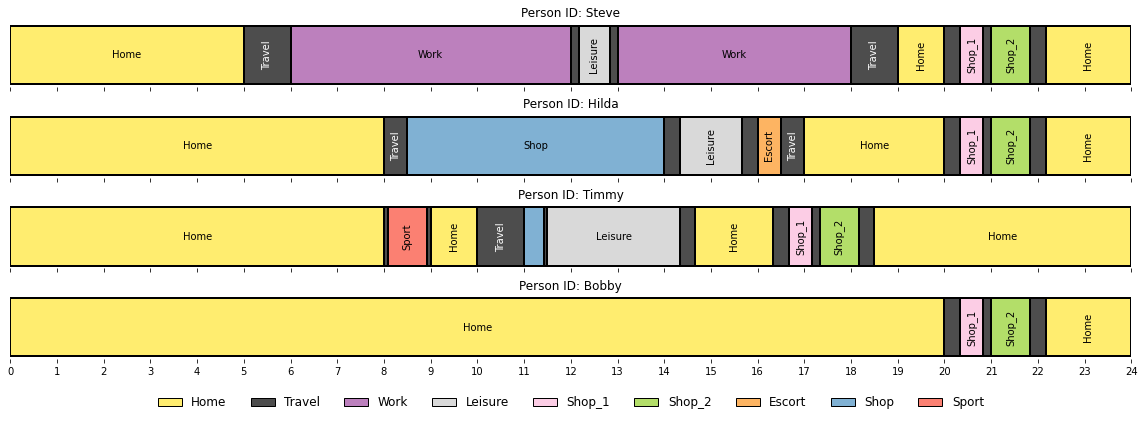

In [8]:
hhld_apply(smiths, HouseholdPolicy(RemoveActivity(['education']),1)).plot()

### `ReduceSharedActivity`
This is a `HouseholdPolicy` level modifier which takes a list of activities, checks the household for those being shared (like going shopping together) and selects a person at random to still perform those activities. Those activities will be deleted for everyone else in the household.

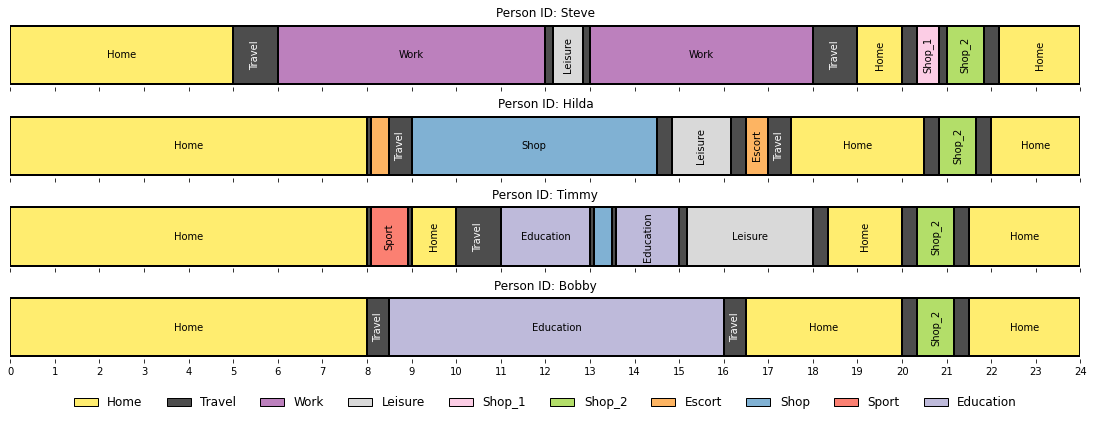

In [9]:
hhld_apply(smiths, HouseholdPolicy(ReduceSharedActivity(['shop_1']),1)).plot()

### `MoveActivityTourToHomeLocation`
Takes a list of activities and moves those to the home location if they form a **tour**. A tour is a chain of activities sandwiched by two home activities (or boundary of persons plan e.g. if person's activities are: `'work', 'home', 'shop', 'work', 'home'` (in that order), their tours are: `['work'] `and `['shop', work']`).

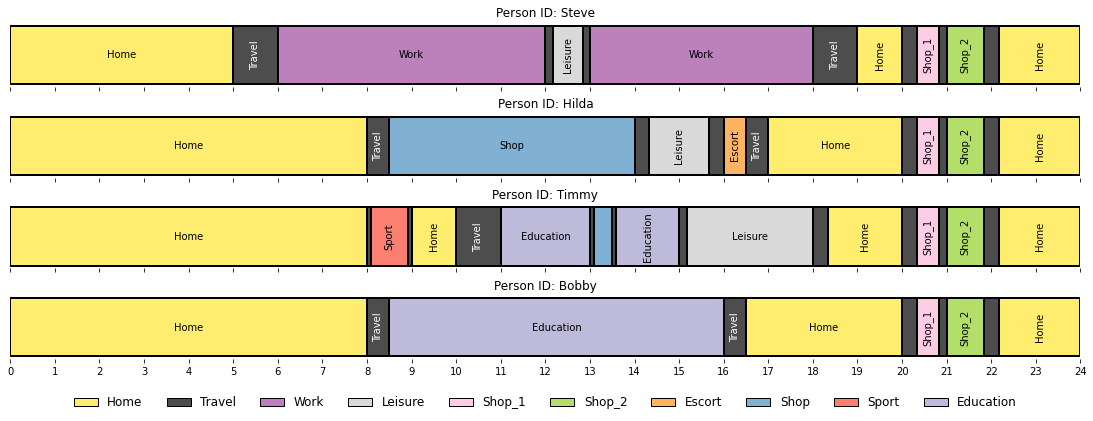

In [10]:
hhld_apply(smiths, HouseholdPolicy(MoveActivityTourToHomeLocation(['shop_1', 'shop_2']),1)).plot()

The result of this modifier do not show up on the plot. Below are the details of Hilda's original plan.

In [11]:
smiths['Hilda'].print()

Person: Hilda
{'age': 45, 'job': 'influencer', 'gender': 'female'}
0:	Activity(act:home, location:a, time:00:00:00 --> 08:00:00, duration:8:00:00)
1:	Leg(mode:walk, area:a --> b, time:08:00:00 --> 08:05:00, duration:0:05:00)
2:	Activity(act:escort, location:b, time:08:05:00 --> 08:30:00, duration:0:25:00)
3:	Leg(mode:pt, area:a --> b, time:08:00:00 --> 08:30:00, duration:0:30:00)
4:	Activity(act:shop, location:b, time:08:30:00 --> 14:00:00, duration:5:30:00)
5:	Leg(mode:pt, area:b --> c, time:14:00:00 --> 14:20:00, duration:0:20:00)
6:	Activity(act:leisure, location:c, time:14:20:00 --> 15:40:00, duration:1:20:00)
7:	Leg(mode:pt, area:c --> b, time:15:40:00 --> 16:00:00, duration:0:20:00)
8:	Activity(act:escort, location:b, time:16:00:00 --> 16:30:00, duration:0:30:00)
9:	Leg(mode:walk, area:a --> b, time:16:30:00 --> 17:00:00, duration:0:30:00)
10:	Activity(act:home, location:a, time:17:00:00 --> 20:00:00, duration:3:00:00)
11:	Leg(mode:car, area:a --> b, time:20:00:00 --> 20:20:00, d

Here are details of Hilda's plan post application of.`MoveActivityTourToHomeLocation` to `'shop'` activities. Compare the location of Activities 6 and 7 with the ones above. At the moment only the Leg's destination and origin get updated, the mode choice and duration remains unchanged.

In [12]:
hhld_apply(smiths, HouseholdPolicy(MoveActivityTourToHomeLocation(['shop_1', 'shop_2']),1))['Hilda'].print()

Person: Hilda
{'age': 45, 'job': 'influencer', 'gender': 'female'}
0:	Activity(act:home, location:a, time:00:00:00 --> 08:00:00, duration:8:00:00)
1:	Leg(mode:walk, area:a --> b, time:08:00:00 --> 08:05:00, duration:0:05:00)
2:	Activity(act:escort, location:b, time:08:05:00 --> 08:30:00, duration:0:25:00)
3:	Leg(mode:pt, area:a --> b, time:08:00:00 --> 08:30:00, duration:0:30:00)
4:	Activity(act:shop, location:b, time:08:30:00 --> 14:00:00, duration:5:30:00)
5:	Leg(mode:pt, area:b --> c, time:14:00:00 --> 14:20:00, duration:0:20:00)
6:	Activity(act:leisure, location:c, time:14:20:00 --> 15:40:00, duration:1:20:00)
7:	Leg(mode:pt, area:c --> b, time:15:40:00 --> 16:00:00, duration:0:20:00)
8:	Activity(act:escort, location:b, time:16:00:00 --> 16:30:00, duration:0:30:00)
9:	Leg(mode:walk, area:a --> b, time:16:30:00 --> 17:00:00, duration:0:30:00)
10:	Activity(act:home, location:a, time:17:00:00 --> 20:00:00, duration:3:00:00)
11:	Leg(mode:walk, area:a --> a, time:20:00:00 --> 20:20:00, 

# Attribute Filters
`PersonAttributeFilter` is a conveniece class to apply policies to selected people in the population which satisfy given attributes.

In [13]:
print_attributes(smiths, ['gender', 'age', 'job'])

Household: Household: 1
Person: Steve
Attributes:
	gender: male
	age: 50
	job: work
Person: Hilda
Attributes:
	gender: female
	age: 45
	job: influencer
Person: Timmy
Attributes:
	gender: male
	age: 18
	job: education
Person: Bobby
Attributes:
	gender: female
	age: 6
	job: education


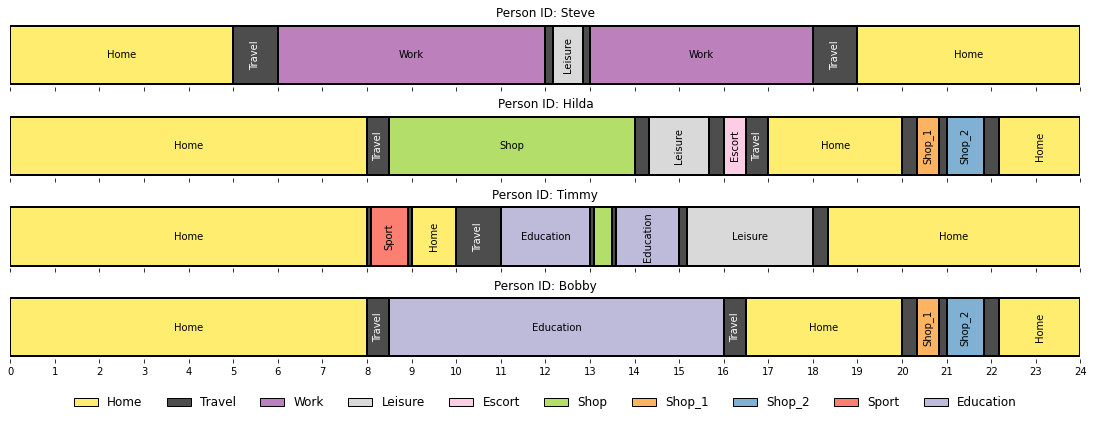

In [14]:
def is_male(attribute_value):
    return attribute_value == 'male'
condition = {'gender': is_male}

hhld_apply(smiths, PersonPolicy(RemoveActivity(['shop_1', 'shop_2']),1,PersonAttributeFilter(condition))).plot()

# Policies

## Person-based Household Quarantine

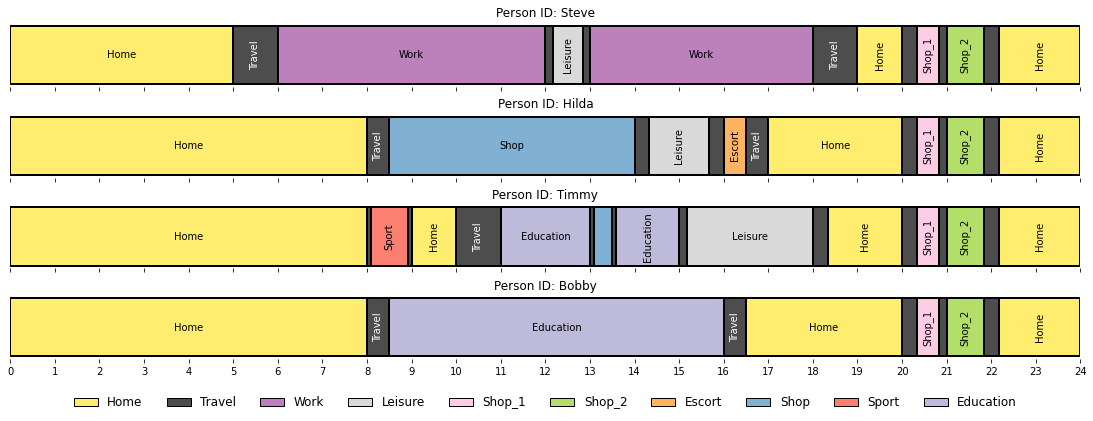

In [15]:
smiths.plot()

In [16]:
policy_household_quarantine_per_person = \
    HouseholdQuarantined(
        PersonProbability(0.01)
)

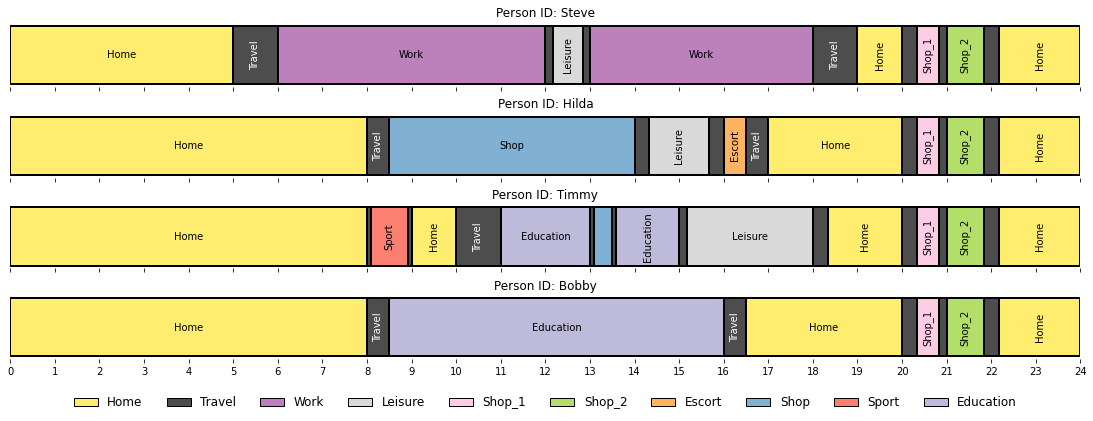

In [17]:
hhld_apply(smiths, policy_household_quarantine_per_person).plot()

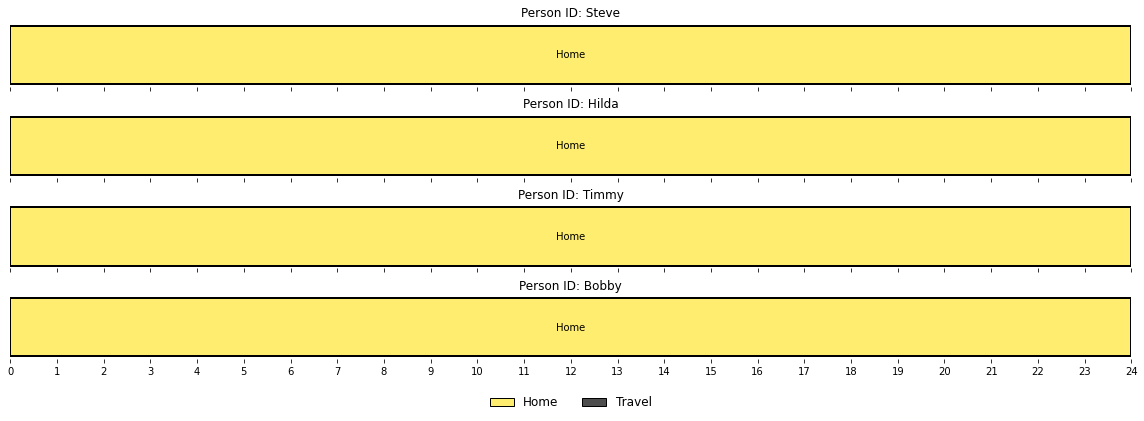

In [18]:
hhld_apply(smiths, HouseholdQuarantined(1)).plot()

## Remove Higher Education

Remove all education activity for persons over age of 17

In [19]:
print_attributes(smiths, ['age', 'job'])

Household: Household: 1
Person: Steve
Attributes:
	age: 50
	job: work
Person: Hilda
Attributes:
	age: 45
	job: influencer
Person: Timmy
Attributes:
	age: 18
	job: education
Person: Bobby
Attributes:
	age: 6
	job: education


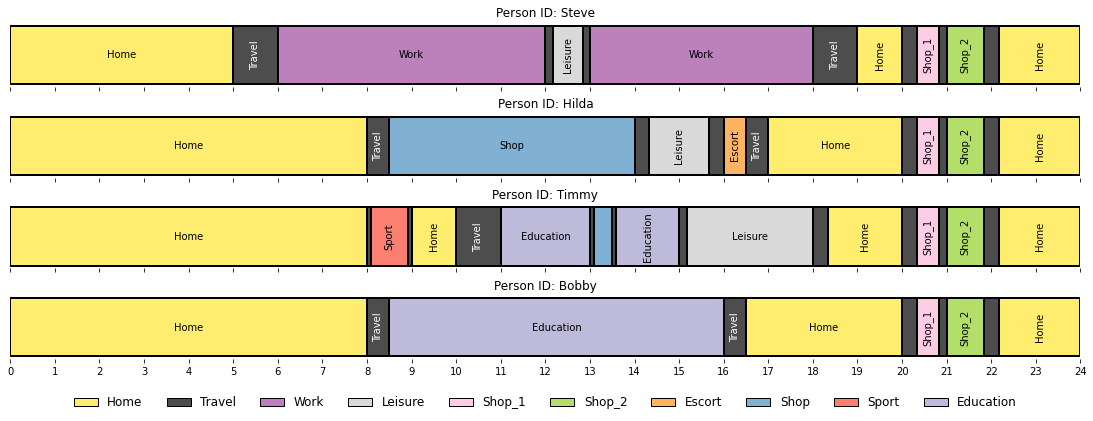

In [20]:
smiths.plot()

In [21]:
def over_17(attribute_value):
    return attribute_value > 17

policy_remove_higher_education = \
    PersonPolicy(
        RemoveActivity(['education']),
        PersonProbability(1),
        PersonAttributeFilter({'age': over_17}, how='all')
)

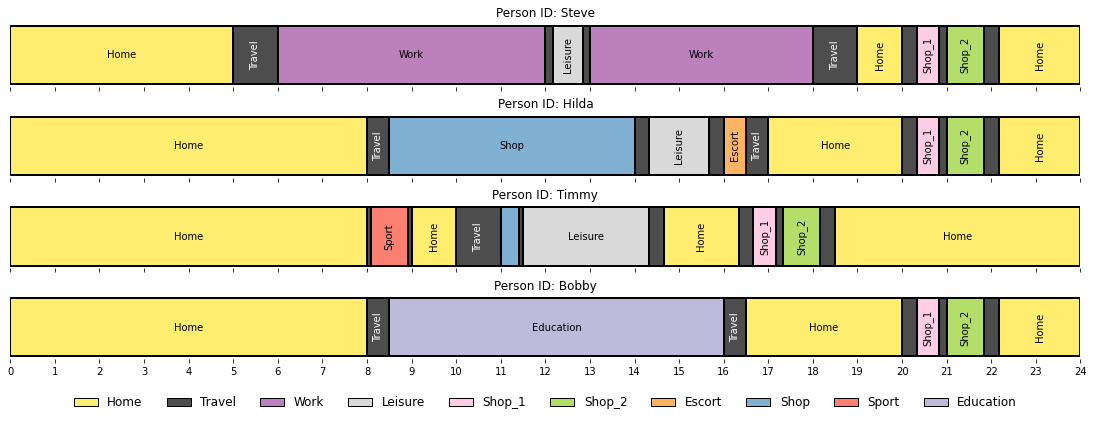

In [22]:
hhld_apply(smiths, policy_remove_higher_education).plot()

## Remove Education

Probabilistically remove education activities from a person, and escort from people who share the household.
Contraint based on the house not being **care constrainted** and people being able to **work from home**.

### Example of non care constrained household

Let's make the Smiths household a non care constrained household with at least one adult is able to work from home and the household is not care constrained.

In [23]:
smiths['Steve'].attributes['wfh'] = True
smiths['Steve'].attributes['care_constrained'] = False
smiths['Hilda'].attributes['wfh'] = True
smiths['Hilda'].attributes['care_constrained'] = False
smiths['Timmy'].attributes['wfh'] = False
smiths['Timmy'].attributes['care_constrained'] = False
smiths['Bobby'].attributes['wfh'] = False
smiths['Bobby'].attributes['care_constrained'] = False

In [24]:
print_attributes(smiths, ['wfh', 'care_constrained'])

Household: Household: 1
Person: Steve
Attributes:
	wfh: True
	care_constrained: False
Person: Hilda
Attributes:
	wfh: True
	care_constrained: False
Person: Timmy
Attributes:
	wfh: False
	care_constrained: False
Person: Bobby
Attributes:
	wfh: False
	care_constrained: False


In [25]:
def attribute_False(attribute_value):
    return not bool(attribute_value)

def attribute_True(attribute_value):
    return bool(attribute_value)

conditions = {
    'care_constrained': attribute_False,
    'wfh': attribute_True
}

# notice that the probability of the household (`HouseholdPolicy`) being chosen is driven
# by the presence of education activities (`ActivityProbability(['education'], 0.95)`)
# in the end the policy removes both education and escort (`RemoveActivity(['education', 'escort'])`)
# but the presence of escort doesn't affect the likelihood
policy_remove_any_education = \
    HouseholdPolicy(
        RemoveActivity(['education', 'escort']), 
        ActivityProbability(['education'], 0.95),
        PersonAttributeFilter(conditions)
)

### Non care constrained household is affected

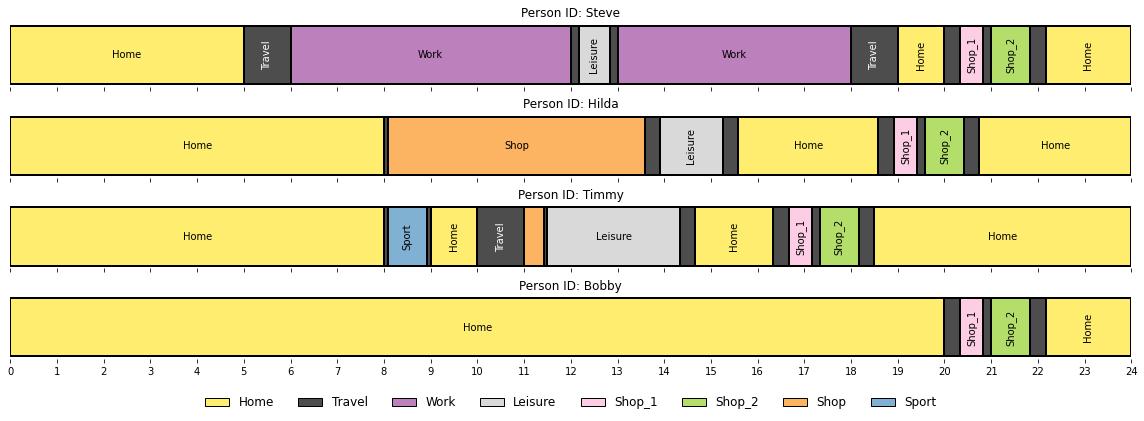

In [26]:
hhld_apply(smiths, policy_remove_any_education).plot()

### Example of care constrained household

In [27]:
smiths['Steve'].attributes['wfh'] = False
smiths['Steve'].attributes['care_constrained'] = True
smiths['Hilda'].attributes['wfh'] = False
smiths['Hilda'].attributes['care_constrained'] = True
smiths['Timmy'].attributes['wfh'] = False
smiths['Timmy'].attributes['care_constrained'] = False
smiths['Bobby'].attributes['wfh'] = False
smiths['Bobby'].attributes['care_constrained'] = False

print_attributes(smiths, ['wfh', 'care_constrained'])

Household: Household: 1
Person: Steve
Attributes:
	wfh: False
	care_constrained: True
Person: Hilda
Attributes:
	wfh: False
	care_constrained: True
Person: Timmy
Attributes:
	wfh: False
	care_constrained: False
Person: Bobby
Attributes:
	wfh: False
	care_constrained: False


### Care constrained household is not affected

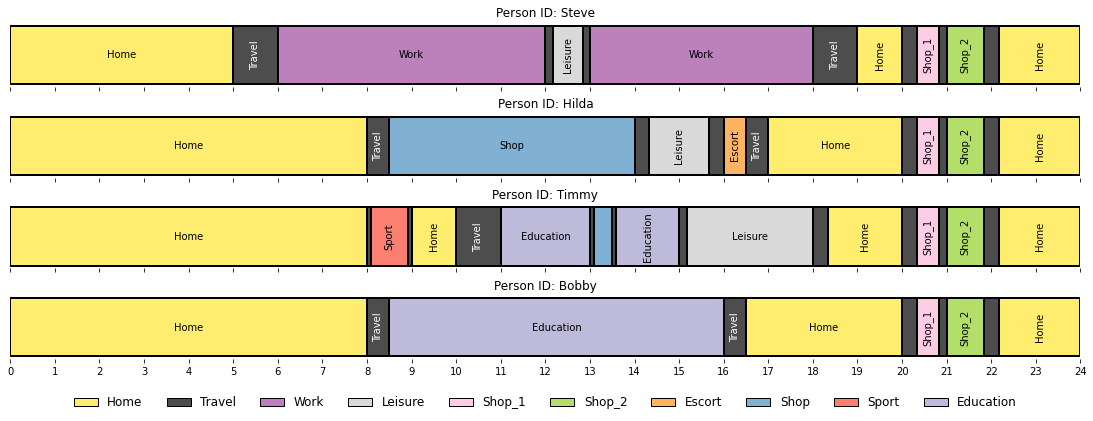

In [28]:
hhld_apply(smiths, policy_remove_any_education).plot()

## Remove Leisure Activities

Remove all leisure activities

In [29]:
policy_remove_leisure = \
    PersonPolicy(
        RemoveActivity(['leisure']), 
        PersonProbability(1)
)

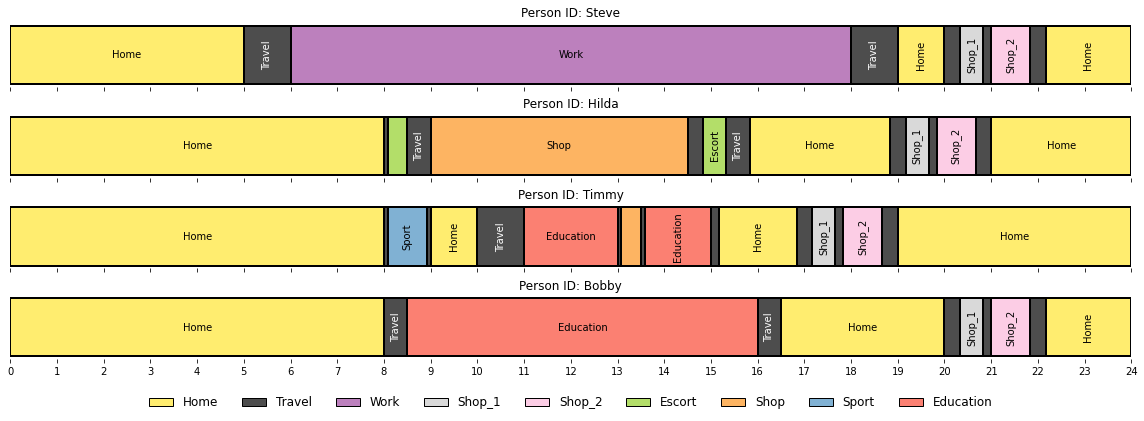

In [30]:
hhld_apply(smiths, policy_remove_leisure).plot()

## Move Sport Activities

Probabilistically move Sport activities to home location

In [31]:
smiths['Timmy'].print()

Person: Timmy
{'age': 18, 'job': 'education', 'gender': 'male', 'wfh': False, 'care_constrained': False}
0:	Activity(act:home, location:a, time:00:00:00 --> 08:00:00, duration:8:00:00)
1:	Leg(mode:walk, area:a --> b, time:08:00:00 --> 08:05:00, duration:0:05:00)
2:	Activity(act:sport, location:b, time:08:05:00 --> 08:55:00, duration:0:50:00)
3:	Leg(mode:walk, area:b --> a, time:08:55:00 --> 09:00:00, duration:0:05:00)
4:	Activity(act:home, location:a, time:09:00:00 --> 10:00:00, duration:1:00:00)
5:	Leg(mode:bike, area:a --> b, time:10:00:00 --> 11:00:00, duration:1:00:00)
6:	Activity(act:education, location:b, time:11:00:00 --> 13:00:00, duration:2:00:00)
7:	Leg(mode:bike, area:b --> c, time:13:00:00 --> 13:05:00, duration:0:05:00)
8:	Activity(act:shop, location:c, time:13:05:00 --> 13:30:00, duration:0:25:00)
9:	Leg(mode:bike, area:c --> b, time:13:30:00 --> 13:35:00, duration:0:05:00)
10:	Activity(act:education, location:b, time:13:35:00 --> 15:00:00, duration:1:25:00)
11:	Leg(mode:

In [32]:
policy_move_sport = \
    PersonPolicy(
        MoveActivityTourToHomeLocation(['sport']), 
        PersonProbability(1)
)

In [33]:
hhld_apply(smiths, policy_move_sport)['Timmy'].print()

Person: Timmy
{'age': 18, 'job': 'education', 'gender': 'male', 'wfh': False, 'care_constrained': False}
0:	Activity(act:home, location:a, time:00:00:00 --> 08:00:00, duration:8:00:00)
1:	Leg(mode:walk, area:a --> a, time:08:00:00 --> 08:05:00, duration:0:05:00)
2:	Activity(act:sport, location:a, time:08:05:00 --> 08:55:00, duration:0:50:00)
3:	Leg(mode:walk, area:a --> a, time:08:55:00 --> 09:00:00, duration:0:05:00)
4:	Activity(act:home, location:a, time:09:00:00 --> 10:00:00, duration:1:00:00)
5:	Leg(mode:bike, area:a --> b, time:10:00:00 --> 11:00:00, duration:1:00:00)
6:	Activity(act:education, location:b, time:11:00:00 --> 13:00:00, duration:2:00:00)
7:	Leg(mode:bike, area:b --> c, time:13:00:00 --> 13:05:00, duration:0:05:00)
8:	Activity(act:shop, location:c, time:13:05:00 --> 13:30:00, duration:0:25:00)
9:	Leg(mode:bike, area:c --> b, time:13:30:00 --> 13:35:00, duration:0:05:00)
10:	Activity(act:education, location:b, time:13:35:00 --> 15:00:00, duration:1:25:00)
11:	Leg(mode:

## Remove Health Activities

Probabilistically remove **individual** health activities from a person. Make vulnerable people more likely to have their health activities removed.

In [34]:
def discrete_joint_distribution_sampler(person, mapping, distribution):
    p = distribution
    for key in mapping:
        value = person.attributes.get(key)
        if value is None:
            raise KeyError(f"Cannot find mapping: {key} in sampling features: {features}")
        p = p.get(value)
        if p is None:
            raise KeyError(f"Cannot find feature for {key}: {value} in distribution: {p}")
    return p

In [35]:
vulnerable_mapping = ['age', 'gender']
vulnerable_distribution = dict(zip(list(range(101)), [{'male': i/100, 'female': i/100, 'other': i/100} for i in range(101)]))

In [36]:
dict(list(vulnerable_distribution.items())[0:15])

{0: {'male': 0.0, 'female': 0.0, 'other': 0.0},
 1: {'male': 0.01, 'female': 0.01, 'other': 0.01},
 2: {'male': 0.02, 'female': 0.02, 'other': 0.02},
 3: {'male': 0.03, 'female': 0.03, 'other': 0.03},
 4: {'male': 0.04, 'female': 0.04, 'other': 0.04},
 5: {'male': 0.05, 'female': 0.05, 'other': 0.05},
 6: {'male': 0.06, 'female': 0.06, 'other': 0.06},
 7: {'male': 0.07, 'female': 0.07, 'other': 0.07},
 8: {'male': 0.08, 'female': 0.08, 'other': 0.08},
 9: {'male': 0.09, 'female': 0.09, 'other': 0.09},
 10: {'male': 0.1, 'female': 0.1, 'other': 0.1},
 11: {'male': 0.11, 'female': 0.11, 'other': 0.11},
 12: {'male': 0.12, 'female': 0.12, 'other': 0.12},
 13: {'male': 0.13, 'female': 0.13, 'other': 0.13},
 14: {'male': 0.14, 'female': 0.14, 'other': 0.14}}

In [37]:
policy_remove_health = \
    PersonPolicy(
        RemoveActivity(['medical']), 
        [PersonProbability(discrete_joint_distribution_sampler, 
                           {'mapping':vulnerable_mapping, 'distribution':vulnerable_distribution}),
         ActivityProbability(['medical'], 0.5)]
)

In [38]:
print_attributes(smiths, ['age', 'gender'])

Household: Household: 1
Person: Steve
Attributes:
	age: 50
	gender: male
Person: Hilda
Attributes:
	age: 45
	gender: female
Person: Timmy
Attributes:
	age: 18
	gender: male
Person: Bobby
Attributes:
	age: 6
	gender: female


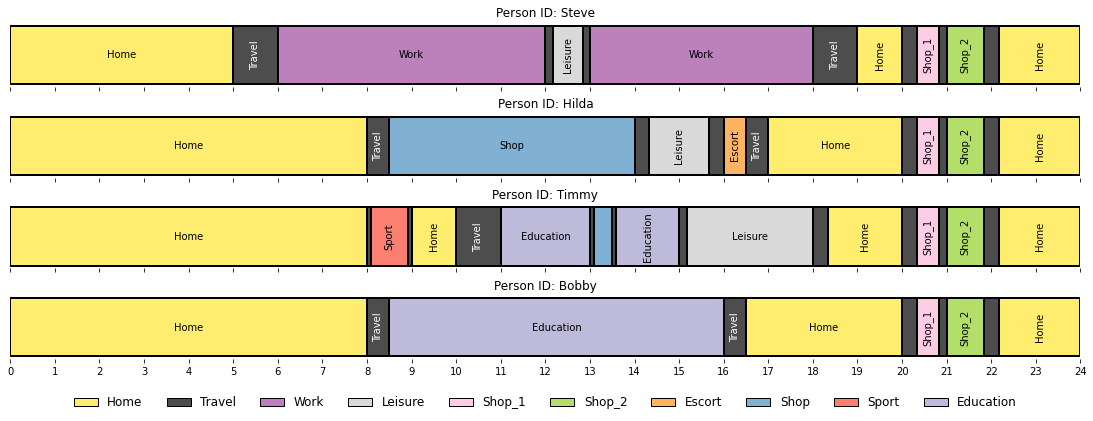

In [39]:
smiths.plot()

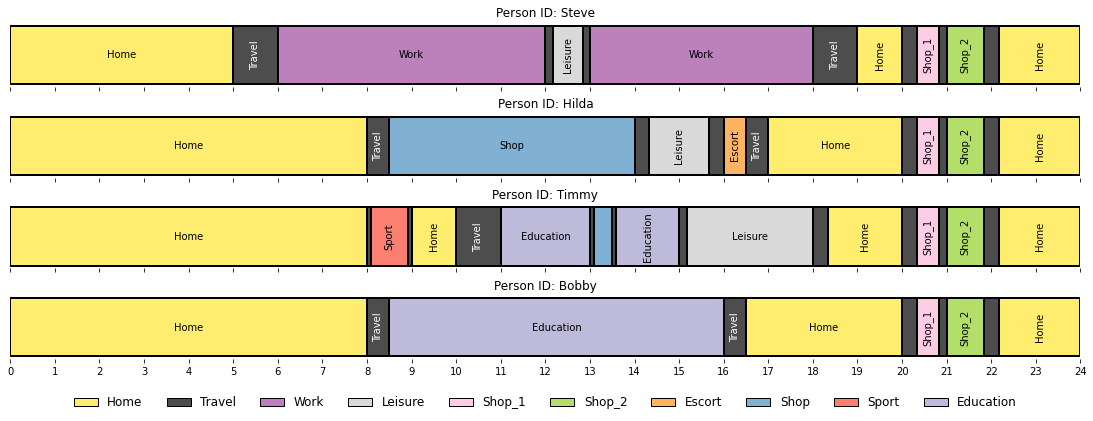

In [40]:
hhld_apply(smiths, policy_remove_health).plot()

## Unemployment/Furlough

Probabilistically remove all work activities from a person

In [41]:
policy_unemployment_and_furlough = \
    PersonPolicy(
        RemoveActivity(['work']), 
        PersonProbability(0.1)
)

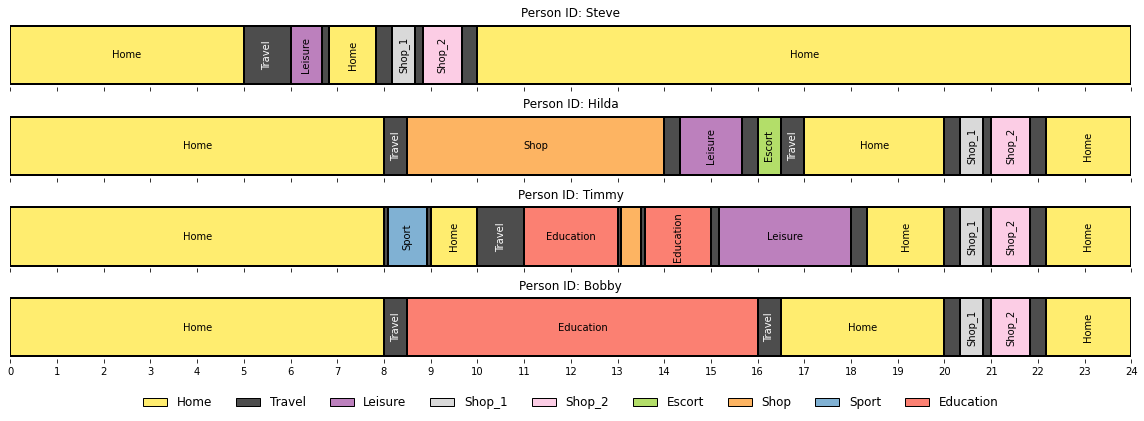

In [42]:
hhld_apply(smiths, PersonPolicy(RemoveActivity(['work']), 1)).plot()

## Work from Home

Probabilistically remove all work activities from a person

In [43]:
smiths['Steve'].attributes['wfh'] = True
smiths['Steve'].attributes['key_worker'] = False
smiths['Hilda'].attributes['wfh'] = False
smiths['Hilda'].attributes['key_worker'] = False
smiths['Timmy'].attributes['wfh'] = False
smiths['Timmy'].attributes['key_worker'] = False
smiths['Bobby'].attributes['wfh'] = False
smiths['Bobby'].attributes['key_worker'] = False

print_attributes(smiths, ['wfh', 'key_worker'])

Household: Household: 1
Person: Steve
Attributes:
	wfh: True
	key_worker: False
Person: Hilda
Attributes:
	wfh: False
	key_worker: False
Person: Timmy
Attributes:
	wfh: False
	key_worker: False
Person: Bobby
Attributes:
	wfh: False
	key_worker: False


In [44]:
conditions = {
    'key_worker': attribute_False,
    'wfh': attribute_True
}

In [45]:
policy_work_from_home = \
    PersonPolicy(
        RemoveActivity(['work']), 
        PersonProbability(0.5),
        PersonAttributeFilter(conditions)
)

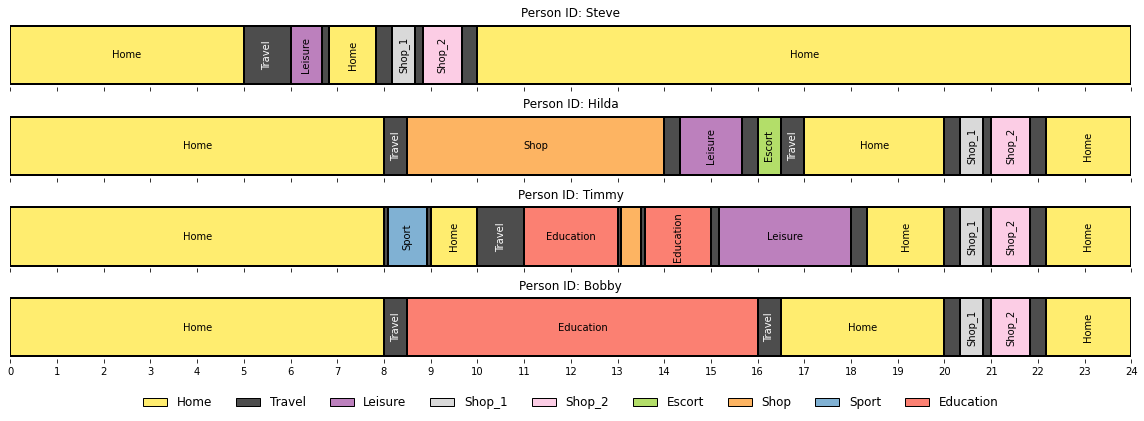

In [46]:
hhld_apply(smiths, PersonPolicy(RemoveActivity(['work']), 1, 
                                PersonAttributeFilter(conditions))).plot()

In [47]:
smiths['Steve'].attributes['wfh'] = False
smiths['Steve'].attributes['key_worker'] = True
smiths['Hilda'].attributes['wfh'] = False
smiths['Hilda'].attributes['key_worker'] = False
smiths['Timmy'].attributes['wfh'] = False
smiths['Timmy'].attributes['key_worker'] = False
smiths['Bobby'].attributes['wfh'] = False
smiths['Bobby'].attributes['key_worker'] = False

print_attributes(smiths, ['wfh', 'key_worker'])

Household: Household: 1
Person: Steve
Attributes:
	wfh: False
	key_worker: True
Person: Hilda
Attributes:
	wfh: False
	key_worker: False
Person: Timmy
Attributes:
	wfh: False
	key_worker: False
Person: Bobby
Attributes:
	wfh: False
	key_worker: False


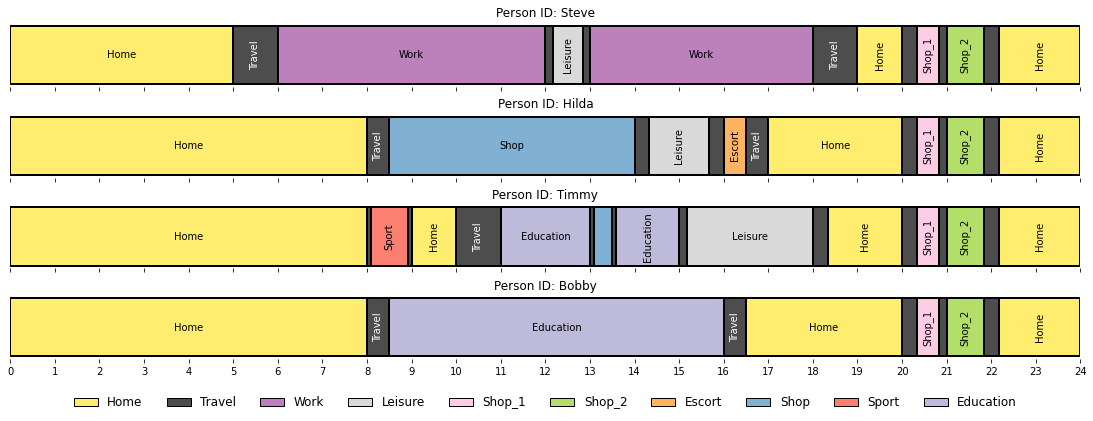

In [48]:
hhld_apply(smiths, PersonPolicy(RemoveActivity(['work']), 1, 
                                               PersonAttributeFilter(conditions))).plot()

## Reduced Work Activity

Probabilistically remove **individual** work activities from a person

In [49]:
policy_reduced_work_activity = \
    ActivityPolicy(
        RemoveActivity(['work']), 
        ActivityProbability(['work'], 0.2)
)

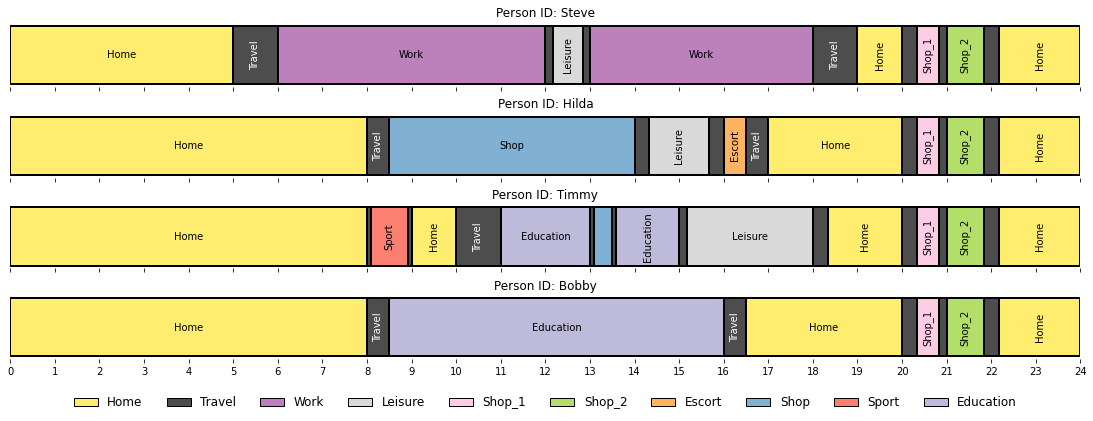

In [50]:
hhld_apply(smiths, policy_reduced_work_activity).plot()

## Shopping 


### Reduce Shared Shopping Activities

In [51]:
policy_reduce_shopping_activities = \
    HouseholdPolicy(
        ReduceSharedActivity(['shop', 'shop_1', 'shop_2']), 
        ActivityProbability(['shop', 'shop_1', 'shop_2'], 1)
)

In [52]:
smiths_shop = hhld_apply(smiths, policy_reduce_shopping_activities)

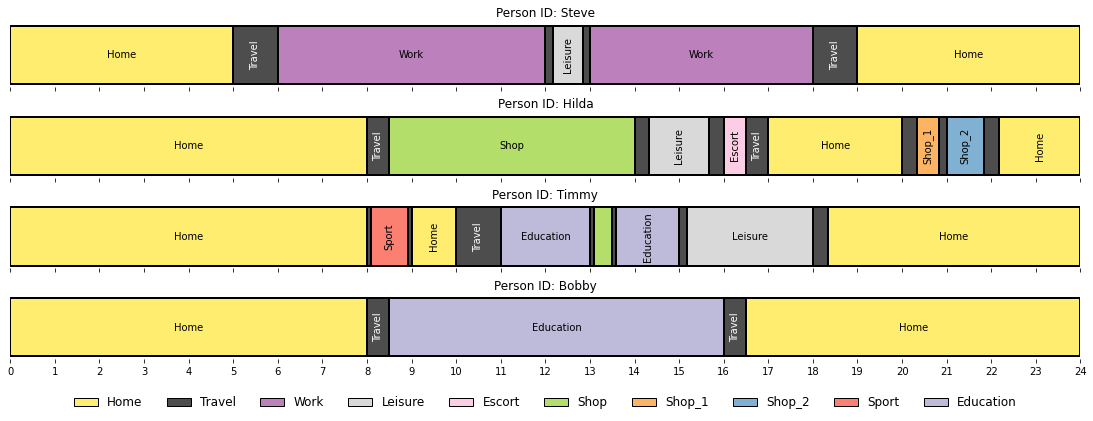

In [53]:
smiths_shop.plot()

In [54]:
person_with_shopping = [p for p in smiths_shop.people.values() if 'shop_1' in [act.act for act in p.activities]][0].pid

In [55]:
smiths_shop.people[person_with_shopping].print()

Person: Hilda
{'age': 45, 'job': 'influencer', 'gender': 'female', 'wfh': False, 'care_constrained': True, 'key_worker': False}
0:	Activity(act:home, location:a, time:00:00:00 --> 08:00:00, duration:8:00:00)
1:	Leg(mode:walk, area:a --> b, time:08:00:00 --> 08:05:00, duration:0:05:00)
2:	Activity(act:escort, location:b, time:08:05:00 --> 08:30:00, duration:0:25:00)
3:	Leg(mode:pt, area:a --> b, time:08:00:00 --> 08:30:00, duration:0:30:00)
4:	Activity(act:shop, location:b, time:08:30:00 --> 14:00:00, duration:5:30:00)
5:	Leg(mode:pt, area:b --> c, time:14:00:00 --> 14:20:00, duration:0:20:00)
6:	Activity(act:leisure, location:c, time:14:20:00 --> 15:40:00, duration:1:20:00)
7:	Leg(mode:pt, area:c --> b, time:15:40:00 --> 16:00:00, duration:0:20:00)
8:	Activity(act:escort, location:b, time:16:00:00 --> 16:30:00, duration:0:30:00)
9:	Leg(mode:walk, area:a --> b, time:16:30:00 --> 17:00:00, duration:0:30:00)
10:	Activity(act:home, location:a, time:17:00:00 --> 20:00:00, duration:3:00:00)


### Move Shopping Activities closer to home

In [56]:
policy_move_shopping = \
    PersonPolicy(
        MoveActivityTourToHomeLocation(['shop_1', 'shop', 'shop_2']), 
        ActivityProbability(['shop_1', 'shop', 'shop_2'], 1.)
)

In [57]:
smiths_shop = hhld_apply(smiths_shop, policy_move_shopping)

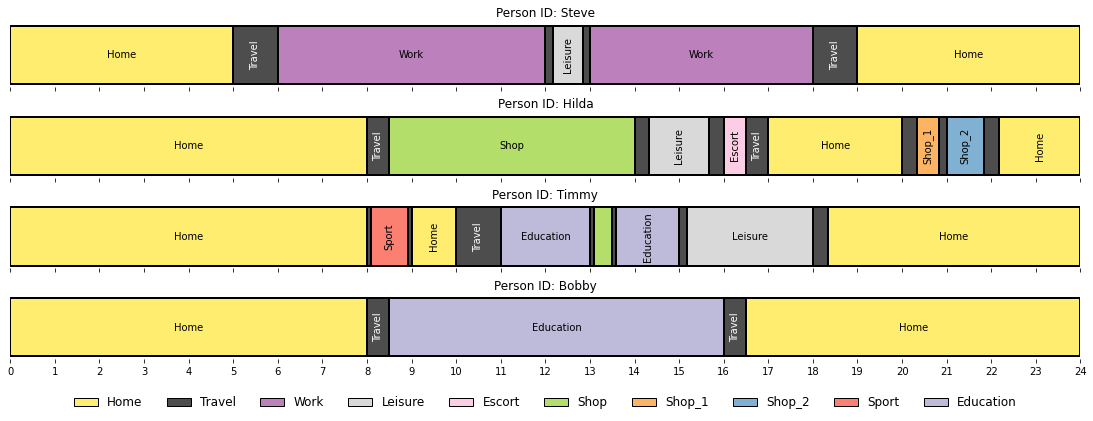

In [58]:
smiths_shop.plot()

In [59]:
smiths.people[person_with_shopping].print()

Person: Hilda
{'age': 45, 'job': 'influencer', 'gender': 'female', 'wfh': False, 'care_constrained': True, 'key_worker': False}
0:	Activity(act:home, location:a, time:00:00:00 --> 08:00:00, duration:8:00:00)
1:	Leg(mode:walk, area:a --> b, time:08:00:00 --> 08:05:00, duration:0:05:00)
2:	Activity(act:escort, location:b, time:08:05:00 --> 08:30:00, duration:0:25:00)
3:	Leg(mode:pt, area:a --> b, time:08:00:00 --> 08:30:00, duration:0:30:00)
4:	Activity(act:shop, location:b, time:08:30:00 --> 14:00:00, duration:5:30:00)
5:	Leg(mode:pt, area:b --> c, time:14:00:00 --> 14:20:00, duration:0:20:00)
6:	Activity(act:leisure, location:c, time:14:20:00 --> 15:40:00, duration:1:20:00)
7:	Leg(mode:pt, area:c --> b, time:15:40:00 --> 16:00:00, duration:0:20:00)
8:	Activity(act:escort, location:b, time:16:00:00 --> 16:30:00, duration:0:30:00)
9:	Leg(mode:walk, area:a --> b, time:16:30:00 --> 17:00:00, duration:0:30:00)
10:	Activity(act:home, location:a, time:17:00:00 --> 20:00:00, duration:3:00:00)


In [60]:
smiths_shop.people[person_with_shopping].print()

Person: Hilda
{'age': 45, 'job': 'influencer', 'gender': 'female', 'wfh': False, 'care_constrained': True, 'key_worker': False}
0:	Activity(act:home, location:a, time:00:00:00 --> 08:00:00, duration:8:00:00)
1:	Leg(mode:walk, area:a --> b, time:08:00:00 --> 08:05:00, duration:0:05:00)
2:	Activity(act:escort, location:b, time:08:05:00 --> 08:30:00, duration:0:25:00)
3:	Leg(mode:pt, area:a --> b, time:08:00:00 --> 08:30:00, duration:0:30:00)
4:	Activity(act:shop, location:b, time:08:30:00 --> 14:00:00, duration:5:30:00)
5:	Leg(mode:pt, area:b --> c, time:14:00:00 --> 14:20:00, duration:0:20:00)
6:	Activity(act:leisure, location:c, time:14:20:00 --> 15:40:00, duration:1:20:00)
7:	Leg(mode:pt, area:c --> b, time:15:40:00 --> 16:00:00, duration:0:20:00)
8:	Activity(act:escort, location:b, time:16:00:00 --> 16:30:00, duration:0:30:00)
9:	Leg(mode:walk, area:a --> b, time:16:30:00 --> 17:00:00, duration:0:30:00)
10:	Activity(act:home, location:a, time:17:00:00 --> 20:00:00, duration:3:00:00)


## All together now!

In [61]:
population = Population(1)
population.add(smiths)

all_together_pop = apply_policies(
    population, 
    [policy_household_quarantine_per_person, 
     policy_remove_higher_education, 
     policy_remove_any_education, 
     policy_remove_leisure, 
     policy_move_sport,
     policy_remove_health, 
     policy_unemployment_and_furlough, 
     policy_work_from_home, 
     policy_reduced_work_activity, 
     policy_reduce_shopping_activities,
     policy_move_shopping
    ])